# Topic = Detecting Defective Lasers

### Name: Aijaz Afzaal Ahmed 
#### Matr. No.: 821335

### **Problem Statement**

For the purpose of quality assurance, a manufacturer of medical lasers wants to introduce a system which recognizes defective products. For the lasers produced, a constant lightoutput with a frequency as constant as possible is desired. Certain fluctuations are acceptable; Lasers in which the power fluctuates to an intolerable extent should be sorted out. For this purpose, the intensity of each laser is measured for one minute – one measurement per second. 

### **Aim**


Classify faulty and non-faulty lasers correctly by implementing different classification models.

### **Steps towards Effective and Efficient solution:**

The following steps are taken for the implementation of the classification models:

**1. Loading Data**

**2. Exploratory Data Analysis (EDA)**

* Insight into the data 

* Plot as series

* Mean Values of Fluctuation Points

* Outlier detection

* Histogram-Checking for distribution of features

* Checking Correlations

* Data Normalization


**3. Model Implementation**

* Train Test Split

* Used_Models

1. SVM (Support Vector Machine)

2. KNN (K Nearest Neighbor)

3. Decision Tree

4. Random Forest

**Following these steps to justify all model's robustness:**   

* Model training using default parameters

* Generating confusion matrix, classification report and ROC curve

* Applying GridSearchCv for finding best parameters

* Model training using best parameters

* Generating confusion matrix, classification report and ROC curve for comparing with the default parameters


**4. Conclusion**

In [1]:
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

# Load Data

In [2]:
mat = scipy.io.loadmat('laser.mat')
df = pd.DataFrame(np.hstack((mat['X'], mat['Y'])))

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,29.8509,25.7777,28.8859,30.3456,25.2192,26.2419,25.7909,26.3381,24.0290,24.1634,28.4092,30.8600,28.9116,28.0824,28.0020,25.5056,30.4142,25.7292,32.8533,28.8833,28.8396,34.3192,27.1845,34.8657,28.4742,29.1341,30.4943,34.6255,33.15040,24.5082,24.5538,26.5650,29.9930,33.8554,8.14042,14.0027,7.82791,7.85876,10.00920,6.12952,12.2320,10.01100,12.1005,14.84510,11.74100,11.44030,5.80527,10.07160,5.59265,16.67200,12.94550,6.655380,15.15470,10.563700,10.28170,9.57184,9.148800,9.65777,5.58567,9.826320,-1.0
1,26.2727,31.2289,29.7408,34.2078,33.3289,33.6097,31.0716,22.5296,28.5874,21.1298,23.5573,28.0780,27.5457,25.8247,18.4541,25.9026,24.4479,24.0030,23.1994,22.1578,17.7109,23.9216,20.5496,15.9133,17.6992,13.8826,17.4940,16.3595,20.67890,11.7902,18.4239,10.4925,11.0013,17.9941,11.67300,11.0144,11.43690,16.19660,16.43480,7.33085,15.0886,16.77910,14.4489,9.55112,11.33090,10.56390,5.99189,8.36910,11.40180,7.86494,2.52577,4.631600,9.33515,6.772150,3.01827,3.67469,0.454739,5.36246,6.94501,7.901080,1.0
2,34.1790,27.0398,29.3324,31.8299,25.8882,28.2443,33.8510,26.0531,31.6576,34.3626,27.1225,30.3713,33.3303,24.2152,28.8840,26.7317,27.7743,28.6641,32.5742,35.4595,14.8257,16.1066,11.6691,17.7811,17.9148,13.6146,10.0265,16.4320,9.32295,15.2855,10.7015,16.7353,15.4596,17.8777,18.06420,15.6215,9.39089,12.06680,11.58610,9.60608,10.2741,16.56010,13.4619,16.03500,9.08389,19.63450,12.80020,19.24490,11.31400,14.99280,15.99610,19.493800,12.01140,11.976100,17.59420,19.59110,13.329700,14.49560,16.86710,18.788800,-1.0
3,33.7603,28.0251,27.9612,23.7675,28.7756,29.6775,26.8554,28.2685,22.4859,31.5602,22.9522,26.7977,30.9502,29.1207,25.3802,23.6087,24.7045,22.4857,27.8181,25.4036,26.4462,25.7293,24.3133,19.4466,27.7824,29.3475,21.0810,23.9031,26.23490,23.1091,23.6027,19.7480,20.4339,24.0073,20.45890,24.8405,24.04580,23.95070,15.41100,23.25000,20.5921,18.51510,20.8686,22.45420,15.96540,19.35890,16.12850,23.69900,14.54130,19.09520,24.17970,21.712700,15.52580,15.788300,21.67010,11.58660,11.863400,17.73090,16.32220,10.722800,1.0
4,34.7860,27.0130,34.6680,32.1062,33.3359,28.2087,25.1472,24.6253,32.8825,30.3093,24.1657,21.3097,28.7224,23.5511,30.3505,28.0259,28.1055,25.9565,20.7353,26.3919,29.1434,27.7809,28.6710,18.3110,27.0955,22.2856,22.9348,17.1293,24.35030,25.4390,24.6046,23.4019,26.4171,17.2402,25.88710,17.2257,24.31380,20.12810,15.09930,17.15570,17.8710,18.54220,20.9500,21.06820,20.16290,19.32960,11.03440,11.35090,13.36030,17.22880,14.94140,20.282500,12.81060,8.694030,18.09260,16.81640,17.109400,10.82510,8.75208,7.730770,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,32.2096,33.9926,30.6470,30.9754,33.6320,30.5443,25.3864,22.7955,27.5945,24.6719,26.9767,27.2901,28.6277,29.6414,23.5934,26.0943,18.6928,24.1568,22.5838,16.3747,14.8516,21.6001,24.7496,23.2977,21.3288,16.7986,17.0826,21.0528,15.25490,12.2563,15.9085,15.4992,13.0897,18.9297,17.92810,18.0678,18.05510,16.88780,11.44690,7.56077,15.9126,11.60120,13.5745,6.56842,11.93990,2.73129,8.92680,8.15836,11.71210,1.17232,8.30608,-0.117786,10.74660,7.476990,6.62886,1.25219,3.908810,3.18627,-1.59294,0.744567,1.0
196,27.8716,27.0351,28.2645,31.3723,34.9079,24.3547,30.2067,28.6332,31.3477,29.7808,31.1270,30.1451,26.8996,28.2241,28.1624,26.4270,25.9911,24.2912,32.0388,25.9925,31.4333,26.7832,30.8351,27.1702,18.0266,10.5709,17.1420,11.8599,17.09720,13.3703,18.0387,13.4584,11.2103,11.0131,10.63850,13.8579,18.37690,15.20750,9.26989,8.22185,16.8713,13.32140,14.5134,16.50850,8.07055,16.01170,16.21550,9.74617,10.50520,10.39580,15.14280,9.024960,17.08030,11.677400,14.01220,11.63180,13.614800,15.04960,18.88220,18.454800,-1.0
197,35.8083,31.0808,24.70

# Exploratory Data Analysis (EDA)

**Insight into the data**

In [4]:
x=df.drop(60,axis=1)    
y=df[60]

Text(0.5, 1.0, 'count of the labels')

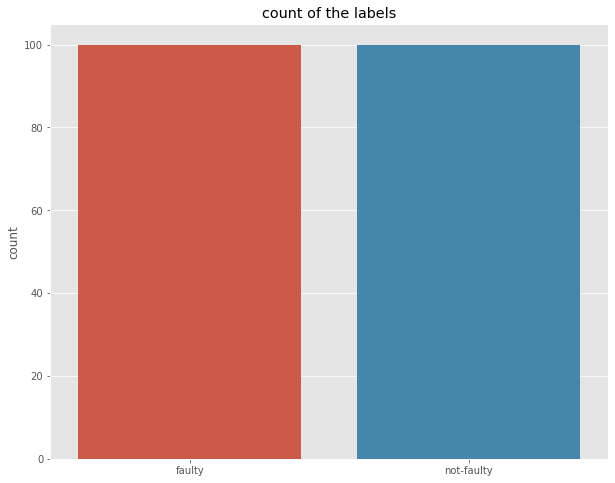

In [5]:
plt.style.use('ggplot')
name = ["faulty" if x==-1 else "not-faulty" for x in y]
plt.subplots(figsize = (10,8))
sns.countplot(name)
plt.title("count of the labels")

<AxesSubplot:title={'center':'Missing values in each dimension'}>

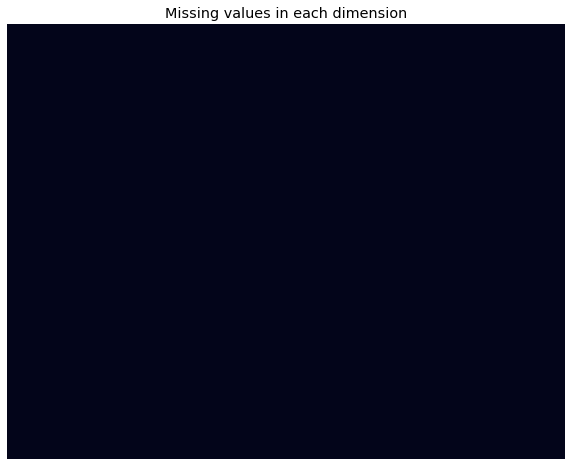

In [6]:
missing = np.isnan(df)
fig, ax = plt.subplots(figsize = (10,8))
plt.title("Missing values in each dimension")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
sns.heatmap(missing, cbar= False)

Total number of missing values: 0

**Plot as series**

In [7]:
def plot(n, x, y):
  data = np.array(x.values.tolist())
  label = np.array(y.values.tolist())
  fig, axs = plt.subplots(1,n, figsize = (18,8))
  plt.style.use('ggplot')
  for i in range(len(axs)):
    axs[i].plot(np.arange(60), data[i,:], label = label[i])
    axs[i].legend()

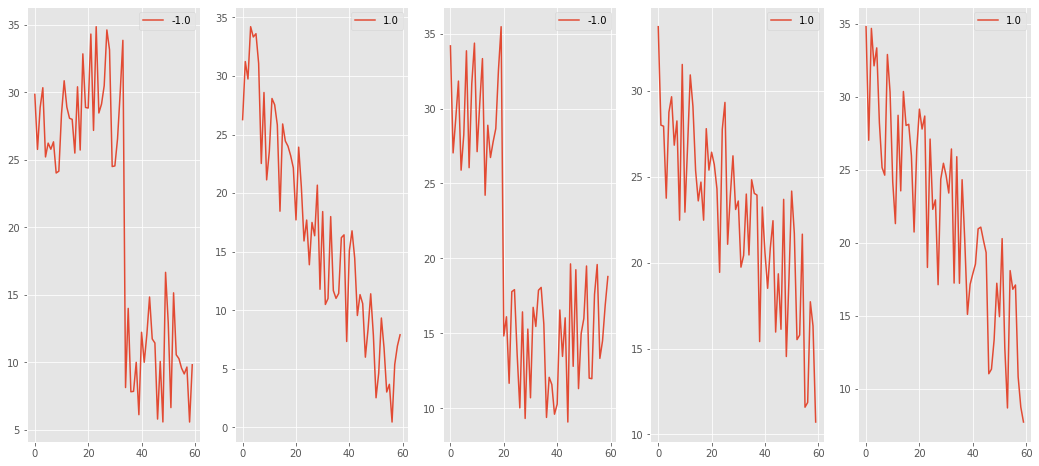

In [8]:
plot(5, x, y)

**Mean Values of Fluctuation Points**

<AxesSubplot:>

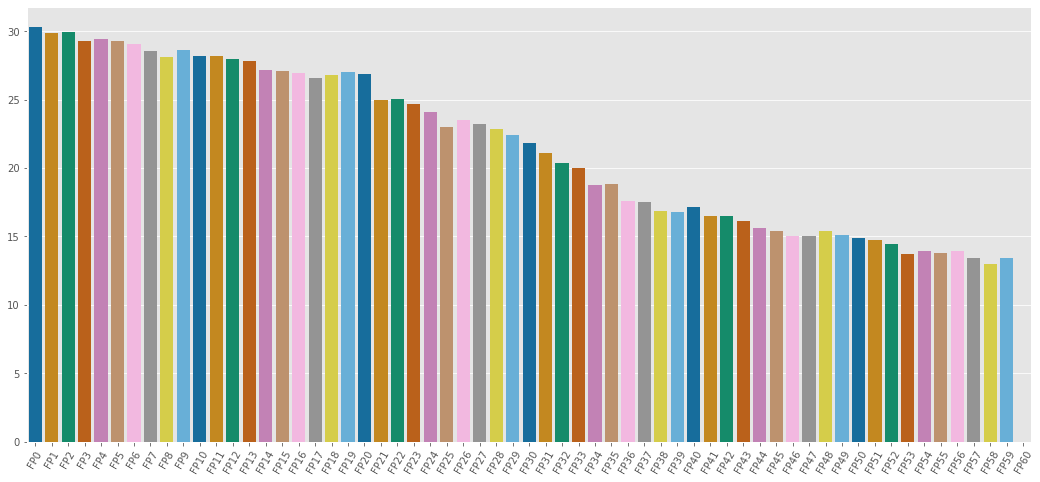

In [9]:
names = ["FP"+str(i) for i in range(df.shape[1])]
means = np.mean(df, axis = 0)
plt.figure(figsize = (18,8))
plt.xticks(rotation = 60)
sns.barplot(names, means, palette= 'colorblind')

**Outliers detections**

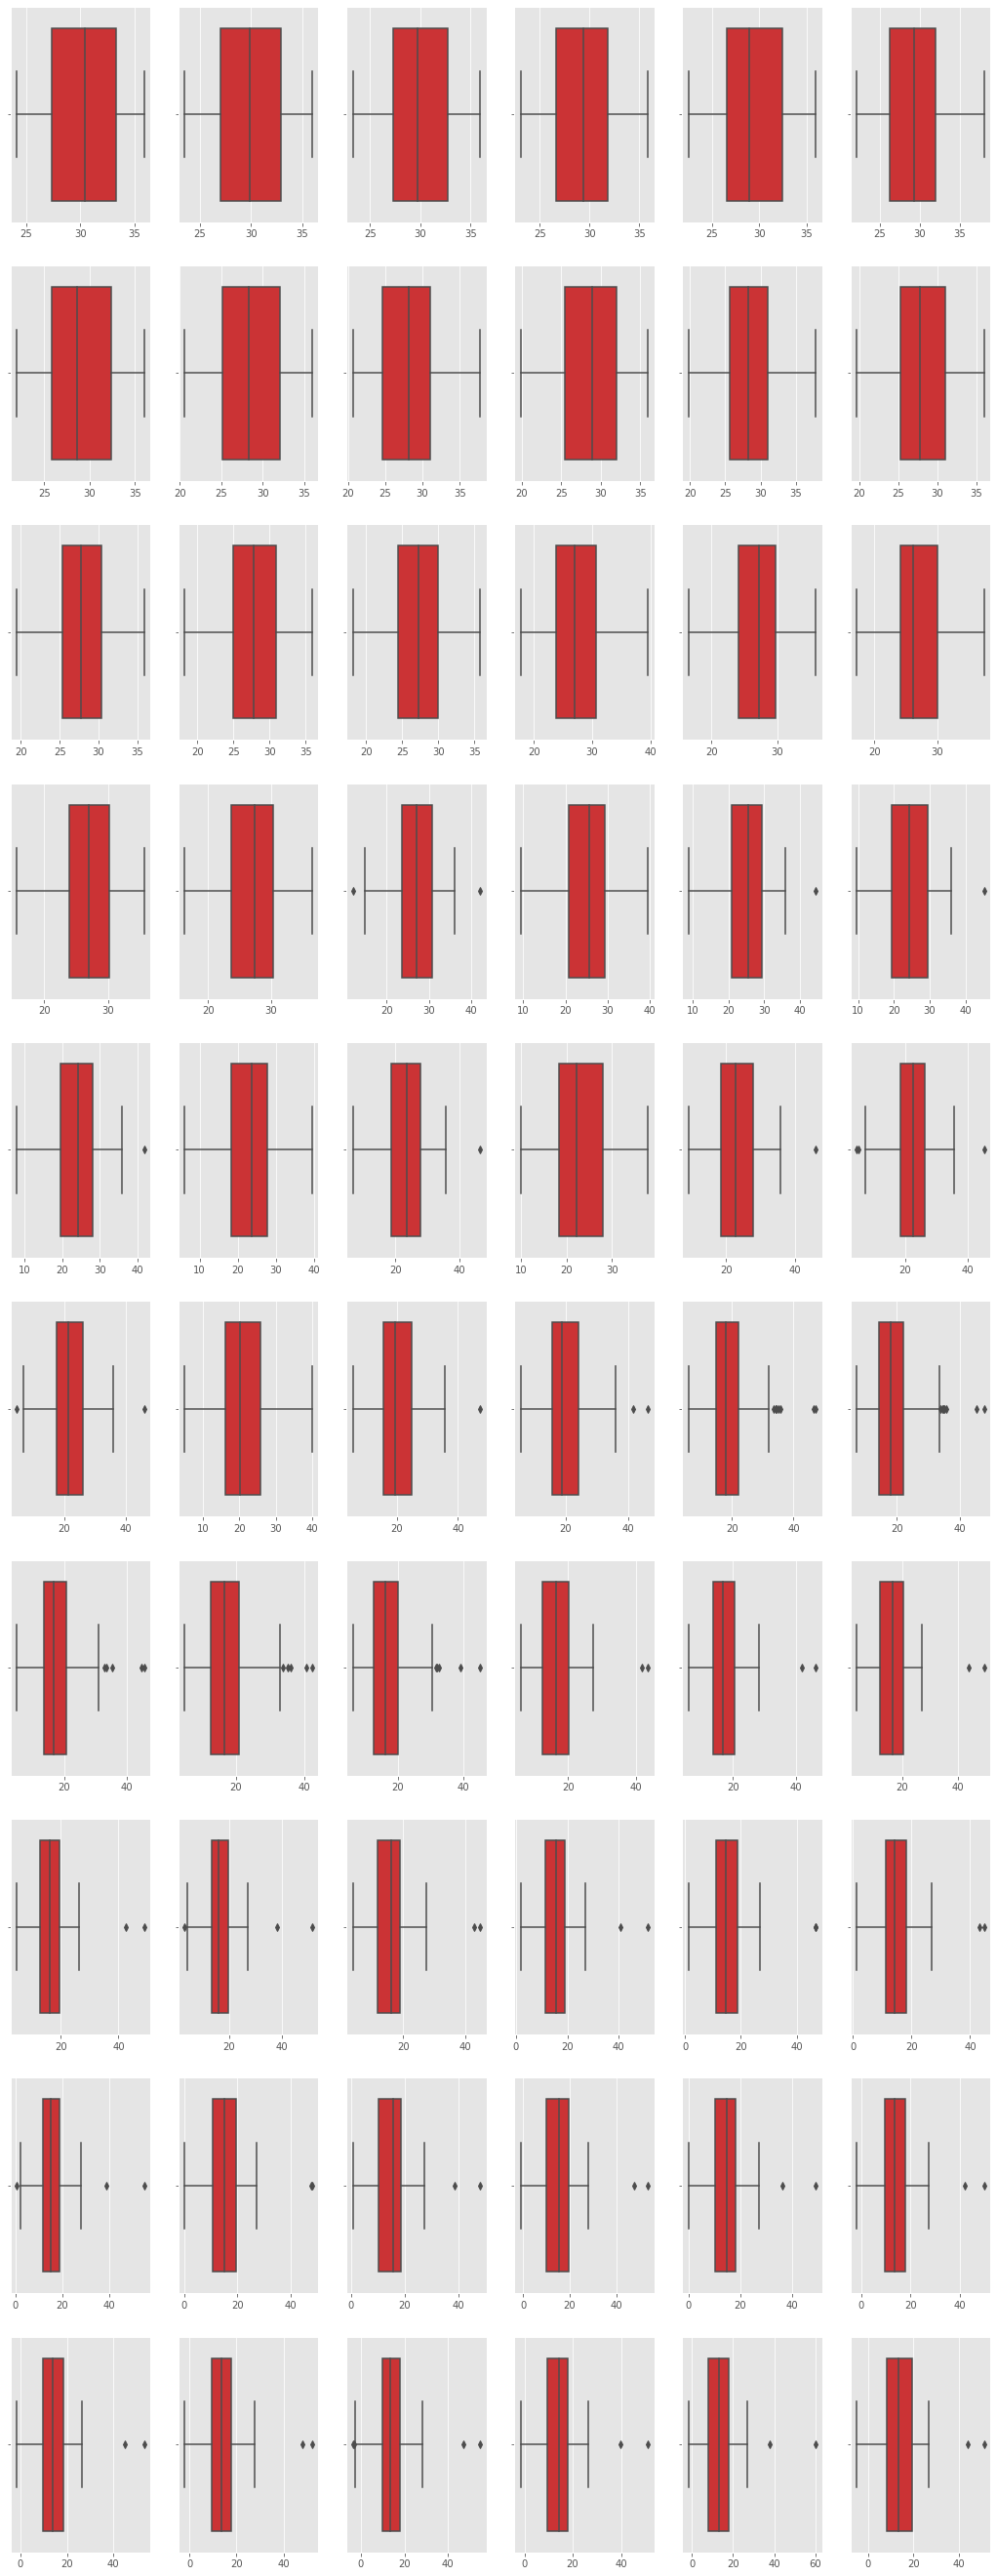

In [10]:
fig, ax = plt.subplots(10,6, figsize = (18,48))
ax = ax.reshape(-1)
data = np.array(x.values.tolist())
for i in range(60):
  sns.boxplot(data[:,i], ax = ax[i], palette= 'Set1', orient='h')

Observations from the boxplot:

1. Some of our features have outliers having a value further from the mean.
2. Some outlier values are close to upper whisker so it will have little effect on our classification algorithm.

**Histogram-Checking for distribution of features**

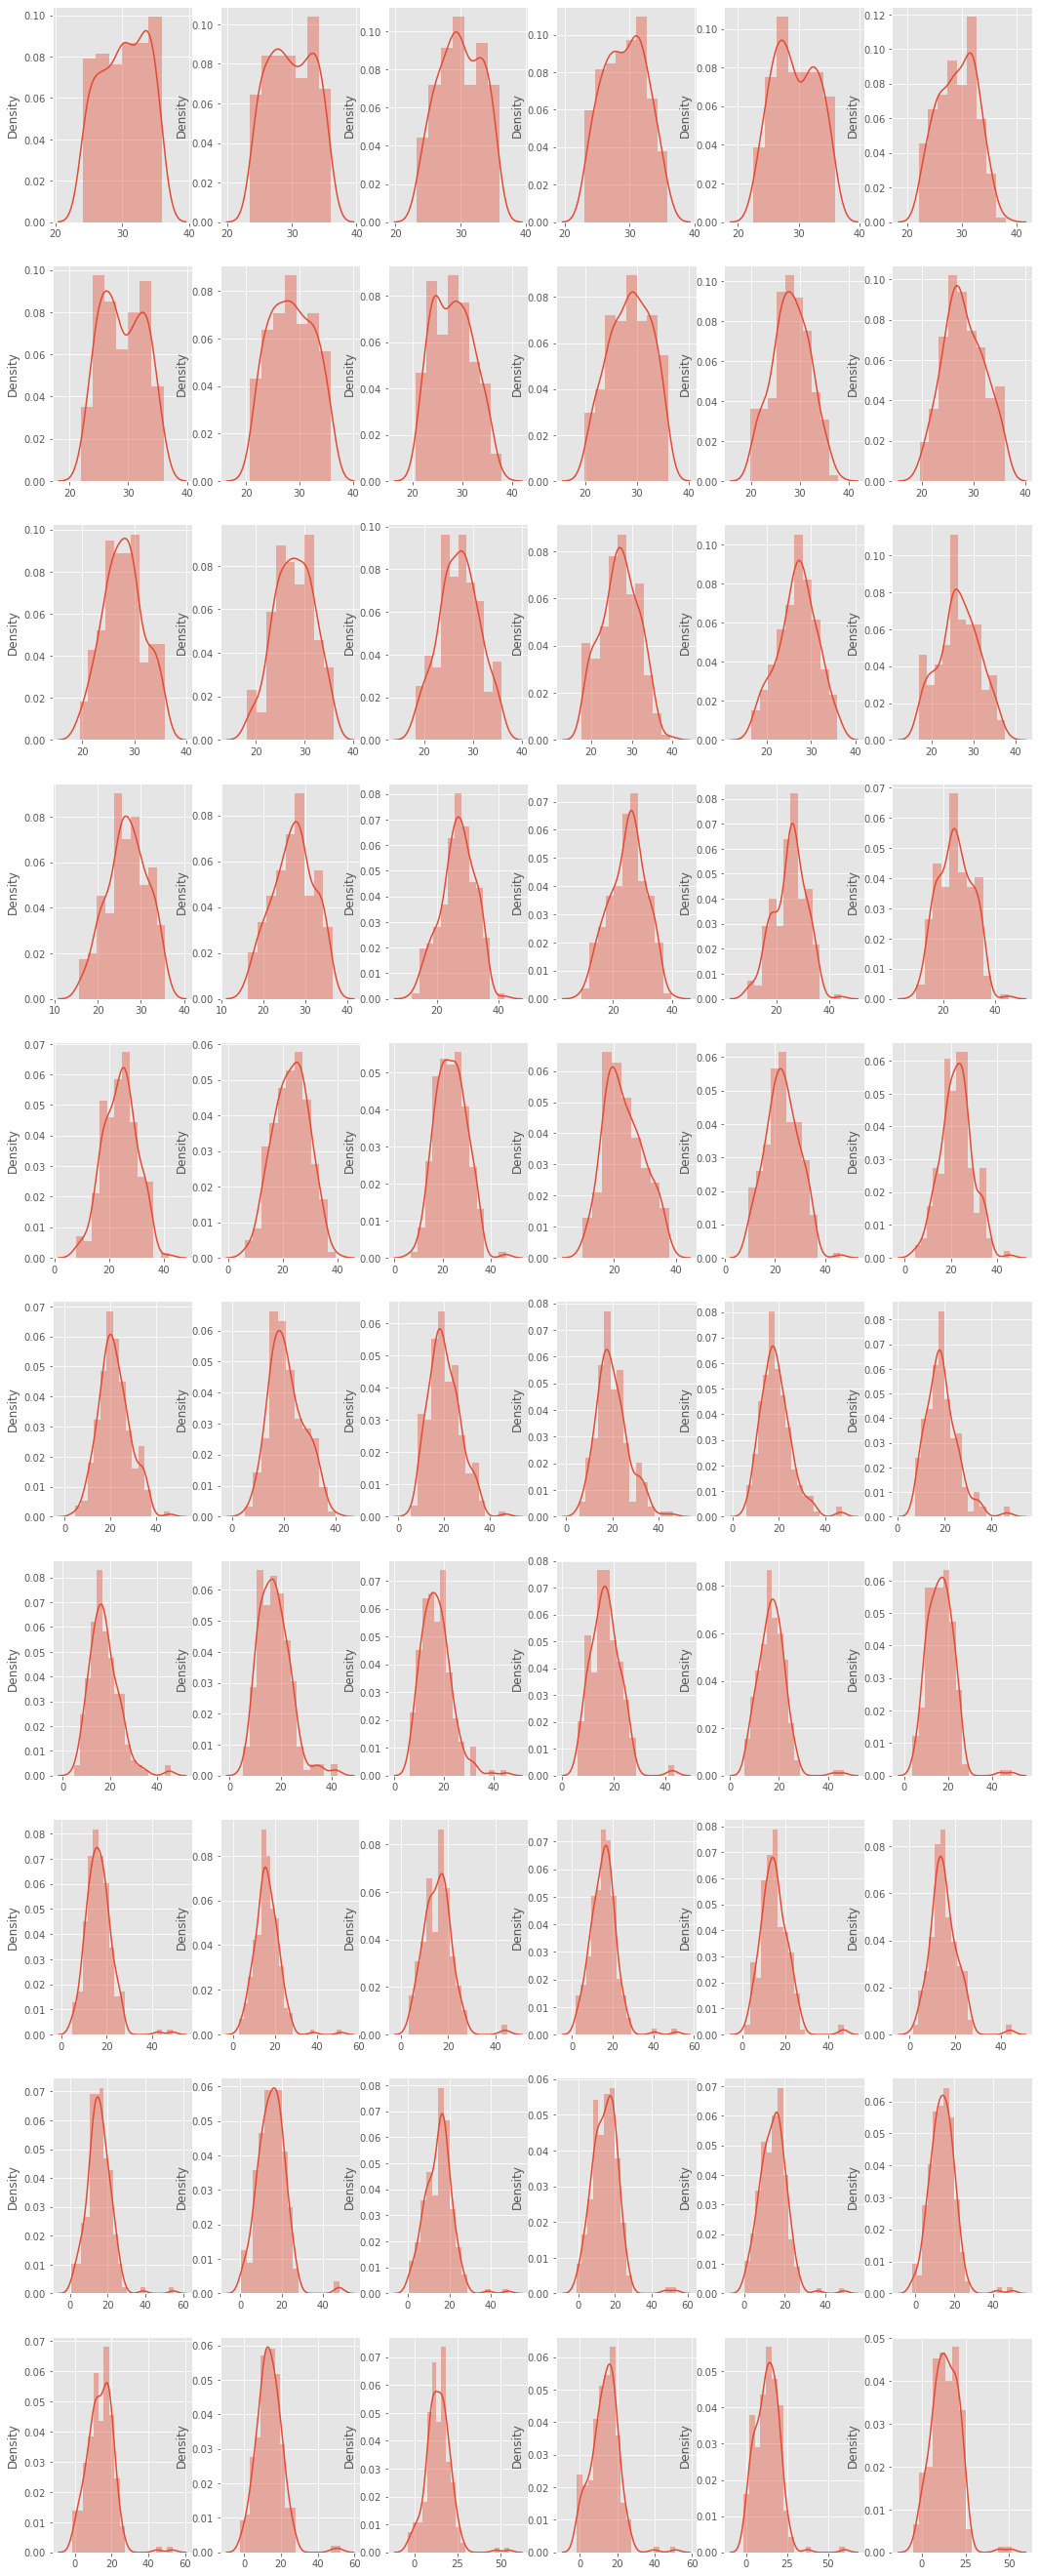

In [11]:
fig, ax = plt.subplots(10,6, figsize = (18,48))
ax = ax.reshape(-1)
data = np.array(x.values.tolist())
for i in range(60):
  sns.distplot(data[:,i],  ax = ax[i])

Using Histogram, we can make an approximation that our attributes are normally distribured with few outliers, hence we can use StandardScaler to scale down our data.

Standard Scaler makes use of the assumption that our features are almost normally ditributed and then scale it by subtracting mean and dividing by standard deviation.

**Checking Correlations**

<AxesSubplot:>

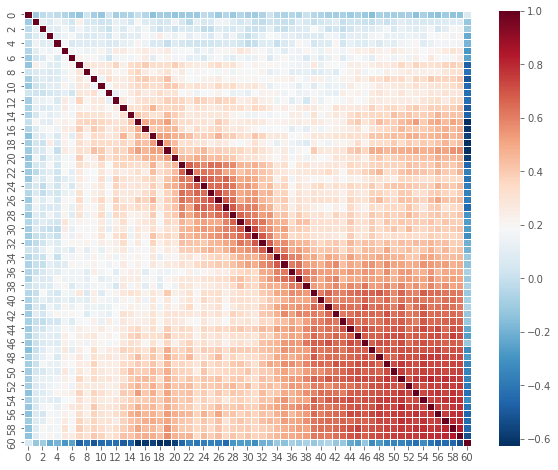

In [12]:
plt.figure(figsize= (10,8))
sns.heatmap(df.corr(),  
            cmap='RdBu_r',
            linewidth=0.5)

**Data Normalization**

In [13]:
scaler = StandardScaler()
datas = scaler.fit_transform(x)

In [14]:
normalized_x = pd.DataFrame(datas)
normalized_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,-0.122229,-1.181415,-0.310482,0.321621,-1.175258,-0.854281,-0.890343,-0.540995,-1.024783,-1.113521,0.061881,0.697842,0.250653,0.056823,0.206333,-0.351299,0.789024,-0.177311,1.315274,0.381383,0.358213,1.559194,0.350660,1.577854,0.721381,0.957396,1.095553,1.817706,1.539879,0.307711,0.397848,0.824502,1.412907,2.023232,-1.634607,-0.733576,-1.564590,-1.586574,-1.148277,-1.886670,-0.894895,-1.068994,-0.780494,-0.225587,-0.650894,-0.628569,-1.465711,-0.826501,-1.527986,0.239414,-0.303186,-1.128722,0.115222,-0.481283,-0.518742,-0.592542,-0.657536,-0.515469,-0.978432,-0.459537
1,-1.157229,0.395215,-0.050009,1.501718,1.095183,1.242319,0.547019,-1.475348,0.114757,-1.866457,-1.211118,-0.018250,-0.103375,-0.504387,-2.119864,-0.263821,-0.573626,-0.542916,-0.779086,-1.004872,-1.677299,-0.176268,-0.731134,-1.366915,-1.044427,-1.431102,-0.952314,-1.095150,-0.330132,-1.584523,-0.506295,-1.582351,-1.381220,-0.294693,-1.091653,-1.186224,-0.985508,-0.211711,-0.073447,-1.674342,-0.372371,0.046094,-0.360633,-1.134669,-0.720279,-0.768859,-1.436017,-1.111702,-0.620658,-1.082894,-1.928116,-1.410446,-0.779944,-1.060467,-1.548608,-1.424436,-1.861055,-1.102240,-0.798897,-0.703439
2,1.129680,-0.816383,-0.174441,0.775150,-0.987961,-0.284473,1.303548,-0.610915,0.882267,1.417911,-0.275712,0.572049,1.395935,-0.904470,0.421218,-0.081130,0.186094,0.444293,1.254724,1.736864,-2.205021,-1.480669,-2.179063,-1.076701,-1.009095,-1.473073,-2.128629,-1.083589,-2.032874,-1.064479,-1.645326,-0.647493,-0.725299,-0.311704,-0.109331,-0.488371,-1.313801,-0.892692,-0.884504,-1.272208,-1.253031,0.010012,-0.537095,-0.021258,-1.100448,0.683120,-0.352736,0.710203,-0.634371,-0.012704,0.172548,0.658477,-0.368282,-0.265530,0.518081,0.820847,-0.078774,0.145415,0.511568,0.675886
3,1.008571,-0.531408,-0.592222,-1.688320,-0.179587,0.123362,-0.600595,-0.067403,-1.410538,0.722358,-1.369879,-0.347801,0.779037,0.314920,-0.432428,-0.769276,-0.515021,-0.864276,0.222915,-0.335850,-0.079556,0.125455,-0.117478,-0.817921,0.608008,0.990816,-0.387274,0.107818,0.502950,0.099548,0.257564,-0.196342,0.006538,0.584059,0.258732,0.908063,1.037657,1.066896,-0.244701,1.139273,0.634320,0.332111,0.787119,1.081046,0.063828,0.639003,0.176836,1.456351,-0.130301,0.603238,1.448759,0.967364,0.172305,0.316808,1.095994,-0.308325,-0.281753,0.587381,0.439600,-0.345965
4,1.305256,-0.824134,1.451221,0.859573,1.097143,-0.294604,-1.065552,-0.961202,1.188476,0.411886,-1.051491,-1.760422,0.201614,-1.069549,0.778508,0.204044,0.261738,-0.129170,-1.313659,-0.132143,0.413780,0.467887,0.593028,-0.994367,0.495439,-0.115130,-0.095254,-0.972391,0.220368,0.446199,0.405341,0.350829,0.886808,-0.404866,1.093041,-0.245377,1.080659,0.436571,-0.296840,0.062142,0.136581,0.336576,0.801672,0.843043,0.773999,0.634313,-0.633695,-0.612193,-0.314761,0.323013,0.008070,0.768270,-0.245349,-0.766887,0.588748,0.429428,0.444451,-0.356003,-0.560227,-0.725014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.560028,1.194549,0.226094,0.514057,1.180040,0.370021,-1.000444,-1.410113,-0.133455,-0.987312,-0.313966,-0.221057,0.177069,0.444353,-0.867754,-0.221580,-1.888040,-0.510341,-0.912637,-2.196880,-2.200284,-0.563750,-0.046341,-0.219548,-0.449608,-0.974435,-1.017120,-0.346715,-1.143421,-1.515175,-0.877309,-0.832599,-1.073967,-0.157967,-0.130250,-0.117821,0.076417,-0.097736,-0.907789,-1.633705,-0.221646,-0.806998,-0.516964,-1.646858,-0.617243,-2.022667,-0.969039,-1.147005,-0.572192,-2.087737,-1.026692,-2.071594,-0.562834,-0.952798,-1.036671,-1.766172,-1.382908,-1.399524,-1.926551,-1.610070
196,-0.694744,-0.817742,-0.499811,0.635330,1.537249,-1.391308,0.311601,0.022070,0.804796,0.280713,0.77495

# Model

**Train Test Split**

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(normalized_x,y,test_size=0.3,random_state=42) # RANDOM SPLIT NOT TEMPORAL

In [16]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
169,1.581086,-0.241198,-1.032305,-1.893956,-0.877066,-1.047613,-0.717174,-1.033649,-0.171753,-1.945236,0.257558,-0.782836,-0.135255,-1.182601,-0.598757,0.335988,-1.851087,-1.854492,-2.202307,-1.764648,-0.193854,0.199312,-1.492395,-0.567624,-1.590230,-0.433936,-0.510820,-0.875785,-1.447565,-1.325237,-0.082285,-0.628460,-0.135525,-0.798443,-1.023764,-0.974267,-0.273343,0.149325,-0.362378,-1.730085,-1.003915,-0.665604,-0.100732,-1.655437,-0.606618,-0.077382,-0.774954,-1.250301,-0.991761,-2.038735,-1.796776,-1.297403,-1.095350,-1.383179,-0.998472,-0.807895,-0.778154,-1.954419,-0.621419,-1.914949
97,-0.779813,-0.257598,-0.709829,0.009226,0.640126,0.463528,0.027732,1.040818,-0.371167,-1.088453,1.922828,-0.539462,1.663963,-0.564716,1.438197,1.221146,0.589913,0.573150,-0.529405,1.286803,0.013233,0.823205,1.673386,1.689850,1.023182,0.584968,1.150497,1.707498,1.665741,0.557133,1.131174,1.970792,2.044964,1.064894,1.385976,2.560607,-0.236069,0.600031,-0.205392,-0.213773,0.983730,0.454492,1.665959,0.410102,1.618625,-0.065216,1.019491,0.498811,1.242745,0.724327,0.378804,0.568035,0.409665,0.881427,1.218726,0.864197,1.174323,0.753100,1.448299,1.163463
31,-1.579131,-0.621357,-0.221210,-0.642910,0.033047,-0.179356,1.154224,0.565582,0.326246,1.819845,-0.215209,1.143893,1.981005,1.517232,-0.563552,0.181766,1.060011,1.796894,1.151632,0.347311,0.138579,1.479945,1.175118,1.537394,0.552207,0.976377,0.734018,1.358532,1.596033,0.898503,1.551261,1.545817,1.307610,0.116055,-0.788082,0.028154,-0.917138,-1.242987,-1.276892,-0.446244,-1.366226,-0.675720,0.387103,0.545950,0.290017,-0.748242,0.126541,0.276077,0.601134,-0.819493,-0.768929,-0.618901,-0.588984,0.878417,-0.128074,-0.471258,-0.599014,0.150128,-0.485510,-0.215377
12,-1.148291,0.214911,1.426176,-0.177037,0.840106,0.815361,-0.494712,1.214170,-0.358868,0.954896,-0.772013,-0.230091,0.652967,0.236370,0.399121,0.456165,0.413207,0.416356,-0.321399,0.493099,0.870022,0.792493,0.234685,0.756795,0.436000,0.495764,1.035741,1.443688,1.936328,0.550735,0.588119,1.611587,0.543627,1.549806,-0.299810,-0.050370,0.898799,0.992859,1.106564,1.854026,1.774980,0.391786,0.334272,-0.059208,0.936471,1.696428,1.022387,1.291897,0.827062,1.411947,0.336168,0.490761,1.902001,2.088233,0.573435,0.801281,0.963231,1.422217,1.149413,1.432709
35,-0.516623,1.241751,-0.379523,1.904922,1.633054,0.441361,0.614169,-0.124958,-0.688426,1.231141,0.406611,0.080618,-0.845254,1.837174,1.704367,1.815798,0.174675,0.198205,0.379267,1.086063,0.677586,0.963008,0.512923,0.368849,1.909265,0.589854,1.000329,0.768195,0.717023,0.714100,0.464355,0.549876,1.822646,3.856860,4.377883,4.019190,4.508498,3.802989,3.736834,4.696035,4.560368,4.478633,4.665255,3.803974,4.955574,4.032631,5.075663,4.742056,3.652186,4.870345,3.691612,4.595922,3.371710,4.330867,4.371747,4.871423,4.601186,3.575356,3.244935,3.893235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-1.463025,1.442908,0.206625,-0.514548,1.786867,0.579203,1.180518,0.243165,-0.320570,0.824566,-0.991093,1.193160,0.391704,0.896065,0.017808,1.720630,1.139514,1.071784,1.438672,0.128413,1.255955,1.168458,1.315109,1.234082,0.001751,0.912544,1.155302,0.304922,0.205524,-0.002607,-0.244797,0.498587,-0.362993,-0.438171,0.254060,1.144104,0.277644,1.771754,0.575606,1.297159,-0.080287,0.501612,1.638230,0.115208,0.237585,1.162497,0.566071,1.646301,1.982505,0.387874,0.398016,1.639887,1.009935,0.623314,0.472227,1.381942,1.493183,1.059032,1.849043,0.963261
14,0.848412,0.345555,0.360246,0.240253,0.215529,-1.053361,-0.975185,1.395864,0.069484,1.007291,0.288203,1.811799,-0.824985,1.427968,1.600141,1.386936,0.476448,1.061830,1.299654,0.373591,0.494021,0.937021,0.7567

### **SVM (Support Vector Machine)**

In [17]:
classifier_svm = SVC(probability=True)
classifier_svm.fit(X_train, y_train)

SVC(probability=True)

accuracy of SVM before hyper-parameter tuning 0.9833333333333333


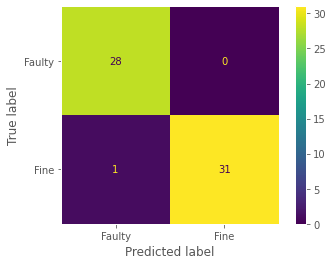

In [18]:
print(f"accuracy of SVM before hyper-parameter tuning {classifier_svm.score(X_test, y_test)}")
plot_confusion_matrix(classifier_svm,
                      X_test,
                      y_test,
                      display_labels=['Faulty','Fine']
                     )
plt.grid(False)
plt.show()


In [19]:
y_pred = classifier_svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.97      1.00      0.98        28
         1.0       1.00      0.97      0.98        32

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



Text(0.5, 1.0, 'SVM ROC Curve before hyper-parameter tuning')

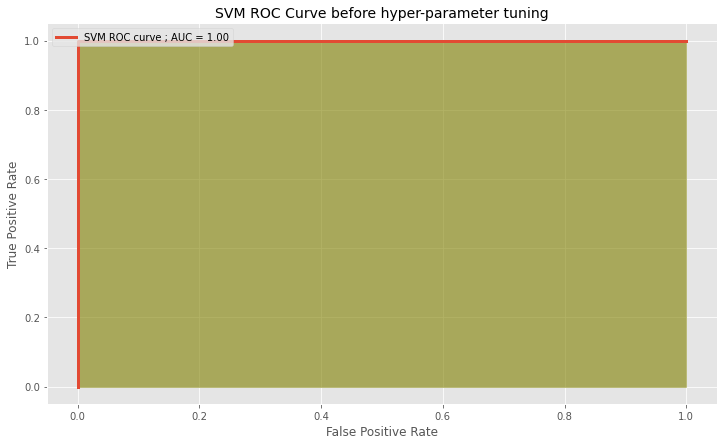

In [20]:
# Examine ROC curve and AUC.
y_hat_proba = classifier_svm.predict_proba(X_test)
svm_fpr, svm_tpr, thresholds2 = roc_curve(y_test, y_hat_proba[:,1])
svm_auc = auc(svm_fpr, svm_tpr)
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(111)
ax1.fill_between(svm_fpr, svm_tpr, 0, color='Olive', alpha=0.6)
ax1 = plt.plot(svm_fpr, svm_tpr, linewidth=3, label='SVM ROC curve ; AUC = %0.2f' % svm_auc)
plt.legend(loc='upper left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve before hyper-parameter tuning', size=14)

**Hyper-parameter tuning for SVM using GridSearchCV**

In [21]:
parameters = [{'C': [0.1, 0.5, 0.7, 1, 1.5], 'kernel': ['linear']},
              {'C': [0.1, 0.5, 0.7, 1, 1.5], 'kernel': ['rbf','poly'], 'gamma': [0.01, 0.05, 0.1, 0.5]}]
grid_search = GridSearchCV(estimator = classifier_svm,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [22]:
grid_search.best_score_


0.9857142857142858

In [23]:
grid_search.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [24]:
cv_results=pd.DataFrame(grid_search.cv_results_)
cv_results=cv_results.sort_values(by='rank_test_score')
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
29,0.010071,0.000010,0.004429,0.004657,1,rbf,0.01,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.964286,0.964286,1.000000,1.000000,1.000000,0.985714,0.017496,1
37,0.011677,0.003210,0.002825,0.003738,1.5,rbf,0.01,"{'C': 1.5, 'gamma': 0.01, 'kernel': 'rbf'}",0.964286,0.964286,1.000000,1.000000,1.000000,0.985714,0.017496,1
21,0.010467,0.000804,0.006044,0.004935,0.7,rbf,0.01,"{'C': 0.7, 'gamma': 0.01, 'kernel': 'rbf'}",0.964286,0.964286,0.964286,1.000000,1.000000,0.978571,0.017496,3
13,0.011677,0.003214,0.002419,0.003906,0.5,rbf,0.01,"{'C': 0.5, 'gamma': 0.01, 'kernel': 'rbf'}",0.964286,0.964286,0.964286,1.000000,1.000000,0.978571,0.017496,3
23,0.012493,0.003891,0.005225,0.004330,0.7,rbf,0.05,"{'C': 0.7, 'gamma': 0.05, 'kernel': 'rbf'}",0.964286,0.964286,0.964286,1.000000,1.000000,0.978571,0.017496,3
39,0.016497,0.003208,0.003633,0.003211,1.5,rbf,0.05,"{'C': 1.5, 'gamma': 0.05, 'kernel': 'rbf'}",0.964286,0.964286,0.964286,1.000000,1.000000,0.978571,0.017496,3
31,0.013696,0.003704,0.004840,0.004336,1,rbf,0.05,"{'C': 1, 'gamma': 0.05, 'kernel': 'rbf'}",0.964286,0.964286,0.964286,1.000000,1.000000,0.978571,0.017496,3
15,0.018516,0.003465,0.000404,0.000808,0.5,rbf,0.05,"{'C': 0.5, 'gamma': 0.05, 'kernel': 'rbf'}",0.964286,0.928571,0.964286,1.000000,1.000000,0.971429,0.026726,8
0,0.009704,0.000828,0.002869,0.003821,0.1,linear,NaN,"{'C': 0.1, 'kernel': 'linear'}",0.964286,0.964286,0.964286,0.964286,0.928571,0.957143,0.014286,9
4,0.009667,0.000807,0.006039,0.003357,1.5,linear,NaN,"{'C': 1.5, 'kernel': 'linear'}",0.964286,0.928571,0.892857,0.892857,0.928571,0.921429,0.026726,10


**Setting the best parameters to a new classifier for comparison**

In [25]:
classifier_svm_tune = SVC(C= 1,kernel = 'rbf',gamma= 0.01,probability=True)
classifier_svm_tune.fit(X_train, y_train)

SVC(C=1, gamma=0.01, probability=True)

accuracy of SVM after hyper-parameter tuning 0.9833333333333333


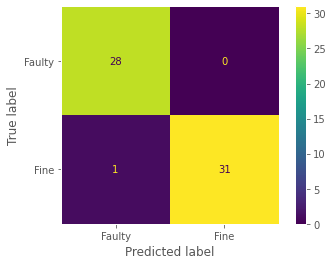

In [26]:
print(f"accuracy of SVM after hyper-parameter tuning {classifier_svm_tune.score(X_test, y_test)}")
plot_confusion_matrix(classifier_svm_tune,
                      X_test,
                      y_test,
                      display_labels=['Faulty','Fine']
                      
                     )
plt.grid(False)
plt.show()

In [27]:
y_pred = classifier_svm_tune.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.97      1.00      0.98        28
         1.0       1.00      0.97      0.98        32

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



Text(0.5, 1.0, 'SVM ROC Curve after hyper-parameter tuning')

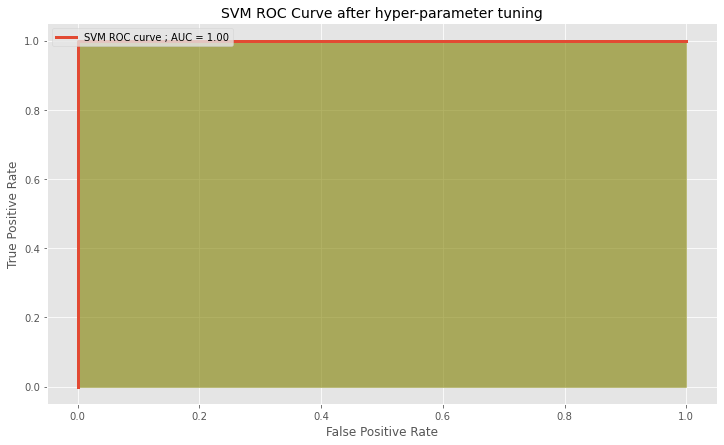

In [28]:
# Examine ROC curve and AUC.
y_hat_proba = classifier_svm_tune.predict_proba(X_test)
svm_fpr, svm_tpr, thresholds2 = roc_curve(y_test, y_hat_proba[:,1])
svm_auc = auc(svm_fpr, svm_tpr)
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(111)
ax1.fill_between(svm_fpr, svm_tpr, 0, color='Olive', alpha=0.6)
ax1 = plt.plot(svm_fpr, svm_tpr, linewidth=3, label='SVM ROC curve ; AUC = %0.2f' % svm_auc)
plt.legend(loc='upper left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve after hyper-parameter tuning', size=14)

### **KNN (K Nearest Neighbour)**

In [29]:
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

accuracy of KNN before hyper-parameter tuning 0.95


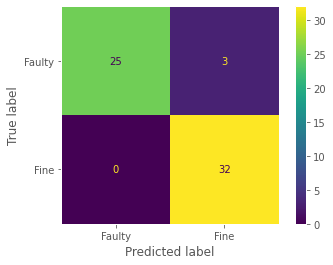

              precision    recall  f1-score   support

        -1.0       1.00      0.89      0.94        28
         1.0       0.91      1.00      0.96        32

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



Text(0.5, 1.0, 'KNN ROC Curve before hyper-parameter tuning')

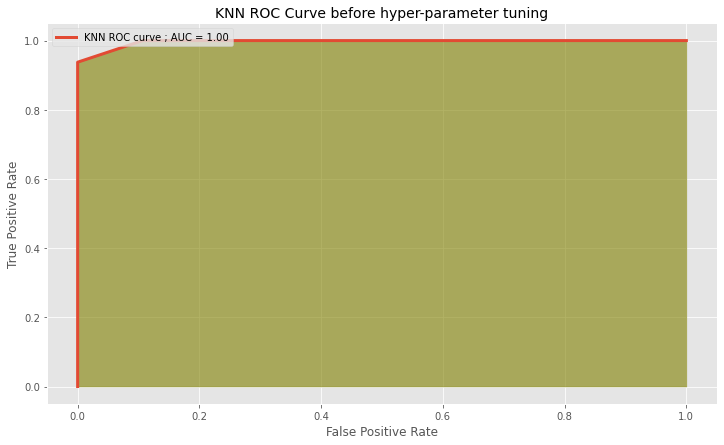

In [30]:
# Accuracy
print(f"accuracy of KNN before hyper-parameter tuning {classifier_knn.score(X_test, y_test)}")
# Confusuion Matrix
plot_confusion_matrix(classifier_knn,
                      X_test,
                      y_test,
                      display_labels=['Faulty','Fine']
                     )
plt.grid(False)
plt.show()
# classification Report
y_pred = classifier_knn.predict(X_test)
print(classification_report(y_test, y_pred))
# ROC curve and AUC.


y_hat_proba = classifier_knn.predict_proba(X_test)
fpr, tpr, thresholds2 = roc_curve(y_test, y_hat_proba[:,1])
knn_auc = auc(fpr, tpr)
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(111)
ax1.fill_between(fpr, tpr, 0, color='Olive', alpha=0.6)
ax1 = plt.plot(fpr, tpr, linewidth=3, label='KNN ROC curve ; AUC = %0.2f' % knn_auc)
plt.legend(loc='upper left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve before hyper-parameter tuning', size=14)

**Hyper-parameter tuning for KNN using GridSearchCV**

In [31]:
k_range = list(range(1, 31))
parameters = dict(n_neighbors=k_range)


In [32]:
grid_search = GridSearchCV(estimator = classifier_knn,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [33]:
print("Best Score using Grid Search:",grid_search.best_score_)
print("Best Parameters using Grid Search:", grid_search.best_params_)

Best Score using Grid Search: 0.9714285714285715
Best Parameters using Grid Search: {'n_neighbors': 2}


In [34]:
cv_results=pd.DataFrame(grid_search.cv_results_)
cv_results=cv_results.sort_values(by='rank_test_score')
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.000000,0.000000,0.012501,0.006250,2,{'n_neighbors': 2},0.964286,0.964286,1.000000,0.964286,0.964286,0.971429,0.014286,1
9,0.003125,0.006249,0.004428,0.006144,10,{'n_neighbors': 10},0.928571,0.964286,0.964286,1.000000,1.000000,0.971429,0.026726,1
7,0.003125,0.006250,0.006250,0.007655,8,{'n_neighbors': 8},0.928571,0.964286,0.964286,0.964286,1.000000,0.964286,0.022588,3
11,0.000000,0.000000,0.009374,0.007654,12,{'n_neighbors': 12},0.892857,0.964286,0.964286,0.964286,1.000000,0.957143,0.034993,4
3,0.000000,0.000000,0.006253,0.007659,4,{'n_neighbors': 4},0.928571,0.964286,1.000000,0.928571,0.964286,0.957143,0.026726,5
5,0.000000,0.000000,0.006250,0.007655,6,{'n_neighbors': 6},0.928571,0.964286,0.964286,0.964286,0.964286,0.957143,0.014286,5
6,0.006250,0.007655,0.006250,0.007655,7,{'n_neighbors': 7},0.928571,0.964286,0.964286,0.964286,0.964286,0.957143,0.014286,5
13,0.003125,0.006250,0.006250,0.007654,14,{'n_neighbors': 14},0.892857,1.000000,0.964286,0.964286,0.964286,0.957143,0.034993,5
2,0.007552,0.007007,0.005728,0.005741,3,{'n_neighbors': 3},0.928571,0.964286,1.000000,0.928571,0.928571,0.950000,0.028571,9
4,0.006251,0.007656,0.006249,0.007654,5,{'n_neighbors': 5},0.928571,0.964286,1.000000,0.928571,0.928571,0.950000,0.028571,9


**Setting the best parameters to a new classifier for comparison**

In [35]:
classifier_knn_tune = KNeighborsClassifier(n_neighbors=2)
classifier_knn_tune.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

accuracy of KNN after hyper-parameter tuning 0.95


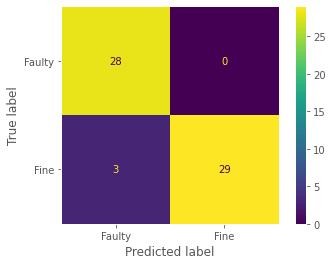

              precision    recall  f1-score   support

        -1.0       0.90      1.00      0.95        28
         1.0       1.00      0.91      0.95        32

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



Text(0.5, 1.0, 'KNN ROC Curve after hyper-parameter tuning')

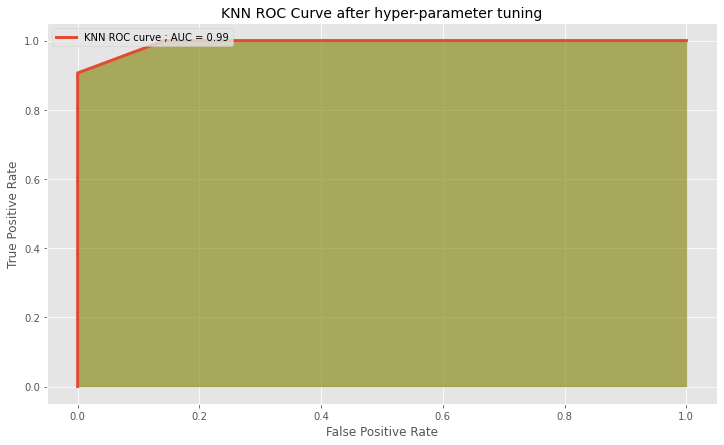

In [36]:
# Accuracy
print(f"accuracy of KNN after hyper-parameter tuning {classifier_knn_tune.score(X_test, y_test)}")
# Confusuion Matrix
plot_confusion_matrix(classifier_knn_tune,
                      X_test,
                      y_test,
                      display_labels=['Faulty','Fine']
                     )
plt.grid(False)
plt.show()
# classification Report
y_pred = classifier_knn_tune.predict(X_test)
print(classification_report(y_test, y_pred))
# ROC curve and AUC.
y_hat_proba = classifier_knn_tune.predict_proba(X_test)
fpr, tpr, thresholds2 = roc_curve(y_test, y_hat_proba[:,1])
auc1 = auc(fpr, tpr)
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(111)
ax1.fill_between(fpr, tpr, 0, color='Olive', alpha=0.6)
ax1 = plt.plot(fpr, tpr, linewidth=3, label='KNN ROC curve ; AUC = %0.2f' % auc1)
plt.legend(loc='upper left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve after hyper-parameter tuning', size=14) 

### **Decision Tree Classifier**

In [37]:
classifier_dt=DecisionTreeClassifier()
classifier_dt.fit(X_train,y_train)

DecisionTreeClassifier()

accuracy of Decision Tree before hyper-parameter tuning 0.8


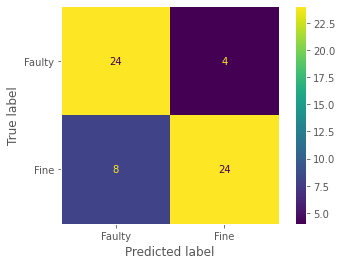

              precision    recall  f1-score   support

        -1.0       0.75      0.86      0.80        28
         1.0       0.86      0.75      0.80        32

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



Text(0.5, 1.0, 'Decision Tree ROC Curve before hyper-parameter tuning')

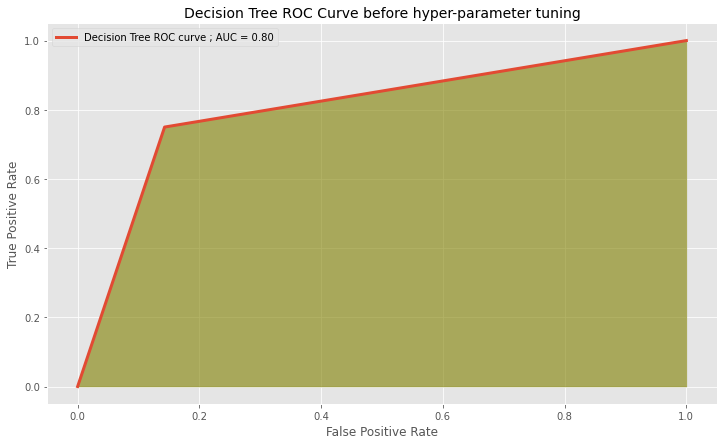

In [38]:
# Accuracy
print(f"accuracy of Decision Tree before hyper-parameter tuning {classifier_dt.score(X_test, y_test)}")
# Confusuion Matrix
plot_confusion_matrix(classifier_dt,
                      X_test,
                      y_test,
                      display_labels=['Faulty','Fine']
                     )
plt.grid(False)
plt.show()
# classification Report
y_pred = classifier_dt.predict(X_test)
print(classification_report(y_test, y_pred))
# ROC curve and AUC.
y_hat_proba = classifier_dt.predict_proba(X_test)
fpr, tpr, thresholds2 = roc_curve(y_test, y_hat_proba[:,1])
auc_dt = auc(fpr, tpr)
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(111)
ax1.fill_between(fpr, tpr, 0, color='Olive', alpha=0.6)
ax1 = plt.plot(fpr, tpr, linewidth=3, label='Decision Tree ROC curve ; AUC = %0.2f' % auc_dt)
plt.legend(loc='upper left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve before hyper-parameter tuning', size=14)

**Hyper-parameter tuning for Decision Tree using GridSearchCV**

In [39]:
parameters={'criterion':["gini",'entropy']
    ,"max_depth":[10, 20, 30, 40, 50, 70,None]}
    
grid_search = GridSearchCV(estimator = classifier_dt,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [40]:
print("Best Score using Grid Search:",grid_search.best_score_)
print("Best Parameters using Grid Search:", grid_search.best_params_)

Best Score using Grid Search: 0.8571428571428571
Best Parameters using Grid Search: {'criterion': 'entropy', 'max_depth': 40}


In [41]:
max_depth=grid_search.best_params_['max_depth']
criterion=grid_search.best_params_['criterion']

In [42]:
cv_results=pd.DataFrame(grid_search.cv_results_)
cv_results=cv_results.sort_values(by='rank_test_score')
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,0.009374,0.007654,0.003125,0.006251,entropy,40,"{'criterion': 'entropy', 'max_depth': 40}",0.857143,0.892857,0.821429,0.964286,0.750000,0.857143,0.071429,1
13,0.009374,0.007654,0.003124,0.006249,entropy,None,"{'criterion': 'entropy', 'max_depth': None}",0.857143,0.857143,0.857143,0.892857,0.785714,0.850000,0.034993,2
7,0.007554,0.009477,0.006250,0.007654,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.857143,0.821429,0.857143,0.928571,0.750000,0.842857,0.058029,3
8,0.012500,0.006250,0.000000,0.000000,entropy,20,"{'criterion': 'entropy', 'max_depth': 20}",0.821429,0.857143,0.857143,0.928571,0.750000,0.842857,0.058029,3
11,0.007555,0.007011,0.003127,0.006253,entropy,50,"{'criterion': 'entropy', 'max_depth': 50}",0.821429,0.892857,0.857143,0.892857,0.750000,0.842857,0.053452,3
2,0.003125,0.006249,0.003125,0.006249,gini,30,"{'criterion': 'gini', 'max_depth': 30}",0.928571,0.928571,0.678571,0.857143,0.785714,0.835714,0.094761,6
3,0.006250,0.007654,0.003125,0.006251,gini,40,"{'criterion': 'gini', 'max_depth': 40}",0.928571,0.928571,0.678571,0.857143,0.785714,0.835714,0.094761,6
9,0.009375,0.007654,0.006248,0.007653,entropy,30,"{'criterion': 'entropy', 'max_depth': 30}",0.857143,0.785714,0.857143,0.928571,0.750000,0.835714,0.062270,6
12,0.012499,0.006249,0.003125,0.006250,entropy,70,"{'criterion': 'entropy', 'max_depth': 70}",0.821429,0.821429,0.857143,0.928571,0.750000,0.835714,0.058029,6
5,0.007554,0.007009,0.004427,0.006141,gini,70,"{'criterion': 'gini', 'max_depth': 70}",0.928571,0.928571,0.678571,0.785714,0.821429,0.828571,0.094221,10


**Setting the best parameters to a new classifier for comparison**

In [43]:
classifier_dt_tune = DecisionTreeClassifier(criterion= criterion, max_depth= max_depth)
classifier_dt_tune.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=40)

accuracy of Decision Tree after hyper-parameter tuning 0.9


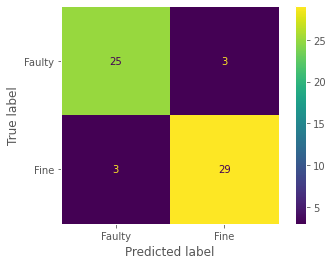

              precision    recall  f1-score   support

        -1.0       0.89      0.89      0.89        28
         1.0       0.91      0.91      0.91        32

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



Text(0.5, 1.0, 'Decision Tree ROC Curve after hyper-parameter tuning')

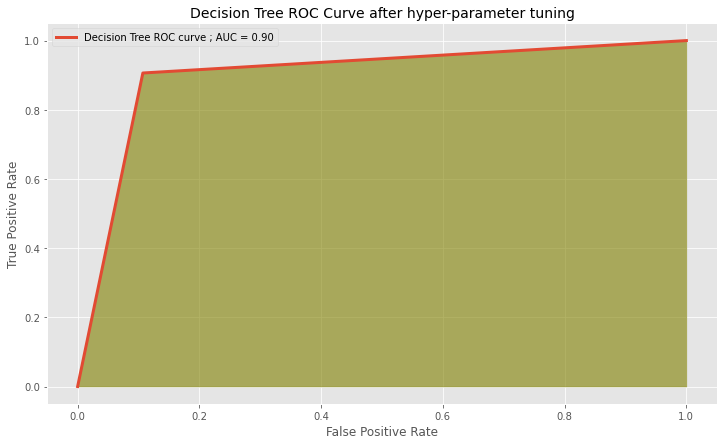

In [44]:
# Accuracy
print(f"accuracy of Decision Tree after hyper-parameter tuning {classifier_dt_tune.score(X_test, y_test)}")
# Confusuion Matrix
plot_confusion_matrix(classifier_dt_tune,
                      X_test,
                      y_test,
                      display_labels=['Faulty','Fine']
                     )
plt.grid(False)
plt.show()
# classification Report
y_pred = classifier_dt_tune.predict(X_test)
print(classification_report(y_test, y_pred))
# ROC curve and AUC.
y_hat_proba = classifier_dt_tune.predict_proba(X_test)
fpr, tpr, thresholds2 = roc_curve(y_test, y_hat_proba[:,1])
auc_dt = auc(fpr, tpr)
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(111)
ax1.fill_between(fpr, tpr, 0, color='Olive', alpha=0.6)
ax1 = plt.plot(fpr, tpr, linewidth=3, label='Decision Tree ROC curve ; AUC = %0.2f' % auc_dt)
plt.legend(loc='upper left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve after hyper-parameter tuning', size=14)

### **Random Forest**

In [45]:
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train,y_train)

RandomForestClassifier()

accuracy of Random Forest before hyper-parameter tuning 0.9666666666666667


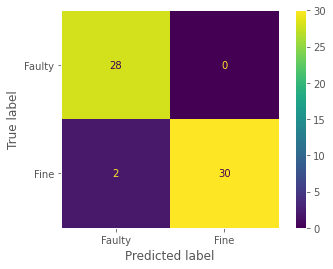

              precision    recall  f1-score   support

        -1.0       0.93      1.00      0.97        28
         1.0       1.00      0.94      0.97        32

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



Text(0.5, 1.0, 'Random Forest ROC Curve before hyper-parameter tuning')

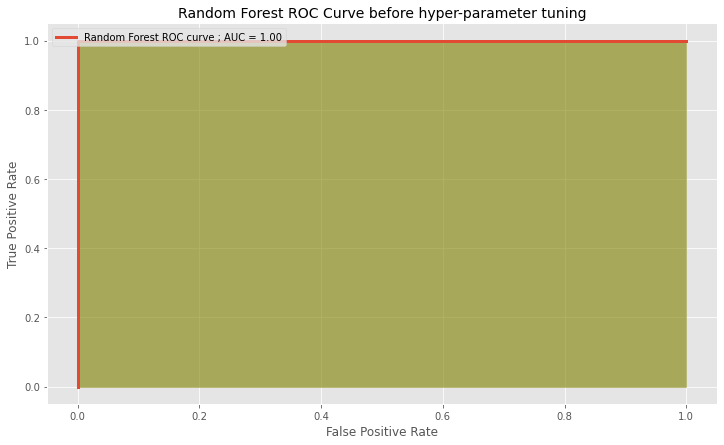

In [46]:
# Accuracy
print(f"accuracy of Random Forest before hyper-parameter tuning {classifier_rf.score(X_test, y_test)}")
# Confusuion Matrix
plot_confusion_matrix(classifier_rf,
                      X_test,
                      y_test,
                      display_labels=['Faulty','Fine']
                     )
plt.grid(False)
plt.show()
# classification Report
y_pred = classifier_rf.predict(X_test)
print(classification_report(y_test, y_pred))
# ROC curve and AUC.
y_hat_proba = classifier_rf.predict_proba(X_test)
fpr, tpr, thresholds2 = roc_curve(y_test, y_hat_proba[:,1])
auc_rf = auc(fpr, tpr)
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(111)
ax1.fill_between(fpr, tpr, 0, color='Olive', alpha=0.6)
ax1 = plt.plot(fpr, tpr, linewidth=3, label='Random Forest ROC curve ; AUC = %0.2f' % auc_rf)
plt.legend(loc='upper left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve before hyper-parameter tuning', size=14)

 **Hyper-parameter tuning for Random Forest using GridSearchCV**

In [47]:
n_estimators = [70,100,150,220,250]
max_depth= [20, 40, 50]

parameters = {'n_estimators': n_estimators,
              'max_depth': max_depth}
    
grid_search = GridSearchCV(estimator = classifier_rf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [48]:
print("Best Score using Grid Search:",grid_search.best_score_)
print("Best Parameters using Grid Search:", grid_search.best_params_)

Best Score using Grid Search: 0.9714285714285715
Best Parameters using Grid Search: {'max_depth': 20, 'n_estimators': 100}


In [49]:
cv_results=pd.DataFrame(grid_search.cv_results_)
cv_results=cv_results.sort_values(by='rank_test_score')
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.275490,0.004822,0.020527,0.000813,20,100,"{'max_depth': 20, 'n_estimators': 100}",0.964286,0.928571,0.964286,1.000000,1.000000,0.971429,0.026726,1
2,0.402838,0.005723,0.032214,0.004022,20,150,"{'max_depth': 20, 'n_estimators': 150}",0.964286,0.928571,0.964286,1.000000,1.000000,0.971429,0.026726,1
8,0.597302,0.012309,0.042266,0.005097,40,220,"{'max_depth': 40, 'n_estimators': 220}",0.964286,0.928571,0.964286,1.000000,1.000000,0.971429,0.026726,1
11,0.268440,0.008515,0.021735,0.003221,50,100,"{'max_depth': 50, 'n_estimators': 100}",0.964286,0.964286,0.964286,0.964286,1.000000,0.971429,0.014286,1
3,0.587203,0.010426,0.042667,0.003899,20,220,"{'max_depth': 20, 'n_estimators': 220}",0.964286,0.928571,0.964286,0.964286,1.000000,0.964286,0.022588,5
4,0.660918,0.008445,0.049500,0.000975,20,250,"{'max_depth': 20, 'n_estimators': 250}",0.964286,0.928571,0.964286,0.964286,1.000000,0.964286,0.022588,5
6,0.266801,0.005193,0.020515,0.005145,40,100,"{'max_depth': 40, 'n_estimators': 100}",0.964286,0.928571,0.928571,1.000000,1.000000,0.964286,0.031944,5
7,0.396823,0.007468,0.028988,0.003509,40,150,"{'max_depth': 40, 'n_estimators': 150}",0.964286,0.928571,0.964286,0.964286,1.000000,0.964286,0.022588,5
12,0.398453,0.004886,0.030227,0.000067,50,150,"{'max_depth': 50, 'n_estimators': 150}",0.964286,0.928571,0.964286,0.964286,1.000000,0.964286,0.022588,5
13,0.587845,0.005048,0.040251,0.000006,50,220,"{'max_depth': 50, 'n_estimators': 220}",0.964286,0.928571,0.964286,0.964286,1.000000,0.964286,0.022588,5


**Setting the best parameters to a new classifier for comparison**

In [50]:
classifier_rf_tune =RandomForestClassifier(max_depth= grid_search.best_params_['max_depth'], n_estimators= grid_search.best_params_['n_estimators'])
classifier_rf_tune.fit(X_train, y_train)

RandomForestClassifier(max_depth=20)

accuracy of Random Forest after hyper-parameter tuning 0.9833333333333333


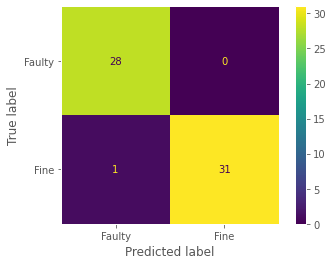

              precision    recall  f1-score   support

        -1.0       0.97      1.00      0.98        28
         1.0       1.00      0.97      0.98        32

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



Text(0.5, 1.0, 'Random Forest ROC Curve after hyper-parameter tuning')

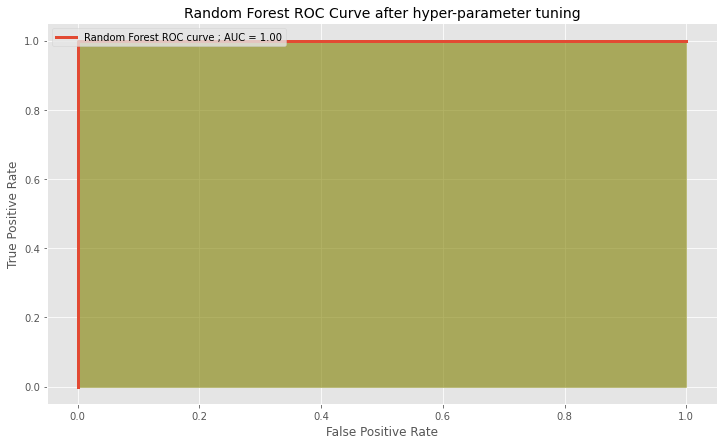

In [51]:
# Accuracy
print(f"accuracy of Random Forest after hyper-parameter tuning {classifier_rf_tune.score(X_test, y_test)}")
# Confusuion Matrix
plot_confusion_matrix(classifier_rf_tune,
                      X_test,
                      y_test,
                      display_labels=['Faulty','Fine']
                     )
plt.grid(False)
plt.show()
# classification Report
y_pred = classifier_rf_tune.predict(X_test)
print(classification_report(y_test, y_pred))
# ROC curve and AUC.
y_hat_proba = classifier_rf_tune.predict_proba(X_test)
fpr, tpr, thresholds2 = roc_curve(y_test, y_hat_proba[:,1])
auc_rf = auc(fpr, tpr)
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(111)
ax1.fill_between(fpr, tpr, 0, color='Olive', alpha=0.6)
ax1 = plt.plot(fpr, tpr, linewidth=3, label='Random Forest ROC curve ; AUC = %0.2f' % auc_rf)
plt.legend(loc='upper left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve after hyper-parameter tuning', size=14)

### **Conclusion**

Among the 4 models, we get improvement after hyper-parameter tuning on the two following models:
* Decision Tree (from 80% to 90%)
* Random Forest (from 96% to 98%)


On the other hand, the following two models did not show improvement after hyper-parameter tuning:
* SVM (98%)
* K-Nearest Neighbor (95%)

Therefore we observe that Random Forest is outperforming all other models.